In [1]:
import os
from netCDF4 import Dataset
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy.interpolate import griddata
import matplotlib.ticker as mticker

In [2]:
# To use PLUMBER2_GPP_common_utils, change directory to where it exists
os.chdir('/g/data/w97/mm3972/scripts/Drought/Post_drought_rainfall')
from common_utils import *

In [3]:
WRF_R_CTL_file  = '/g/data/w97/mm3972/scripts/Drought/Post_drought_rainfall/nc_files/WACE_2024_WRF_LAI_albedo_runs/CTL/LIS.CABLE.Tinderbox_Drought_select.d01.nc'   # Total rainfall
WRF_R_SEN_file  = '/g/data/w97/mm3972/scripts/Drought/Post_drought_rainfall/nc_files/WACE_2024_WRF_LAI_albedo_runs/SEN/LIS.CABLE.Tinderbox_Drought_select.d01.nc'   # Total rainfall

# WRF_R_CTL_file  = '/g/data/w97/mm3972/scripts/Drought/Post_drought_rainfall/nc_files/WRF_Tinderbox_Drought_Group_Paper/Clim_2019/LIS.CABLE.202002-202002.d01.nc'   # Total rainfall
# WRF_R_SEN_file  = '/g/data/w97/mm3972/scripts/Drought/Post_drought_rainfall/nc_files/WRF_Tinderbox_Drought_Group_Paper/Drought_2019/LIS.CABLE.202002-202002.d01.nc'   # Total rainfall

# WRF_R_CTL_file  = '/g/data/w97/mm3972/scripts/Drought/Post_drought_rainfall/nc_files/WRF_Tinderbox_Drought_Group_Paper/Drought_2019/LIS.CABLE.202002-202002.d01.nc'   # Total rainfall
# WRF_R_SEN_file  = '/g/data/w97/mm3972/scripts/Drought/Post_drought_rainfall/nc_files/WACE_2024_WRF_LAI_albedo_runs/SEN/LIS.CABLE.202002-202002.d01.nc'   # Total rainfall

In [16]:
time_s = datetime(2020,1,1,0,0,0,0) #+ timedelta(days=int(i))
time_e = datetime(2020,6,1,0,0,0,0) #+ timedelta(days=int(i))

In [17]:
var_name  = 'Rainf_tavg'
lat_name  =  'lat'
lon_name  =  'lon'
# # "Aus":
# loc_lat    = [-44,-10]
# loc_lon    = [112,154]

# "SE Aus":
loc_lat       = [-40,-23]
loc_lon       = [133, 155]

# Open the NetCDF4 file (add a directory path if necessary) for reading:
time, Ctl   = read_var(WRF_R_CTL_file, var_name, loc_lat, loc_lon, lat_name, lon_name)
time, Sen   = read_var(WRF_R_SEN_file, var_name, loc_lat, loc_lon, lat_name, lon_name)
time, lats  = read_var(WRF_R_CTL_file, lat_name, loc_lat, loc_lon, lat_name, lon_name)
time, lons  = read_var(WRF_R_CTL_file, lon_name, loc_lat, loc_lon, lat_name, lon_name)


In [18]:
ctl         = spatial_var(time,Ctl,time_s,time_e)*24*60*60.*365
sen         = spatial_var(time,Sen,time_s,time_e)*24*60*60.*365

/g/data/w97/mm3972/scripts/Drought/Post_drought_rainfall/common_utils.py:712: RuntimeWarning: Mean of empty slice
  var       = np.nanmean(Var[time_cood],axis=0)


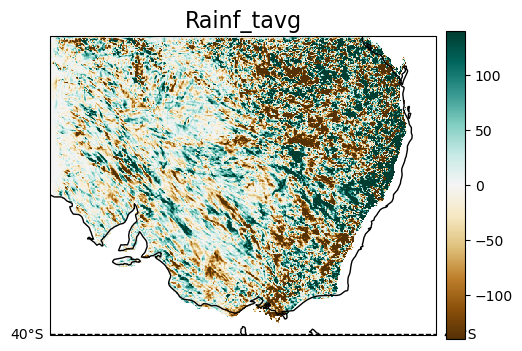

In [19]:

# ================== Start Plotting =================
fig = plt.figure(figsize=(6,5))
ax  = plt.axes(projection=ccrs.PlateCarree())

# start plotting
if loc_lat == None:
    ax.set_extent([135,155,-40,-25])
else:
    ax.set_extent([loc_lon[0],loc_lon[1],loc_lat[0],loc_lat[1]])

ax.coastlines(resolution="50m",linewidth=1)

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', linestyle='--')
gl.xlabels_top   = False
gl.ylabels_right = False
gl.xlines        = True

if loc_lat == None:
    gl.xlocator = mticker.FixedLocator([135,140,145,150,155])
    gl.ylocator = mticker.FixedLocator([-40,-35,-30,-25])
else:
    gl.xlocator = mticker.FixedLocator(loc_lon)
    gl.ylocator = mticker.FixedLocator(loc_lat)

gl.xformatter   = LONGITUDE_FORMATTER
gl.yformatter   = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}


# clevs = [-350,-300,-250,-200,-150,-100,-50,50,100,150,200,250,300,350]

clevs = [-140,-120,-100,-80,-60,-40,-20,20,40,60,80,100,120,140]
# clevs = [50,100,150,200,250,300,350,400,450,500]
cmap  = plt.cm.BrBG

# plt.contourf(lons, lats, sen, clevs, transform=ccrs.PlateCarree(), cmap=cmap, extend='both') #,#bwr)#coolwarm)#cm.BrBG) # clevs,

# plt.contourf(lons, lats, ctl, clevs, transform=ccrs.PlateCarree(), cmap=cmap, extend='both') #,#bwr)#coolwarm)#cm.BrBG) # clevs,

extent = (min(loc_lon), max(loc_lon), min(loc_lat), max(loc_lat))
plot   = ax.imshow(ctl-sen, origin="lower", extent=extent, interpolation="none", vmin=np.min(clevs), vmax=np.max(clevs), transform=ccrs.PlateCarree(), cmap=cmap)

# plot = ax.contourf(lons, lats, ctl-sen, levels=clevs, transform=ccrs.PlateCarree(), cmap=cmap, extend='both') #,#bwr)#coolwarm)#cm.BrBG) # clevs, 

plt.title(var_name, size=16)
cb = plt.colorbar(plot, ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
# cb.set_label(units,size=14,rotation=270,labelpad=15)
cb.ax.tick_params(labelsize=10)

plt.savefig('./plots/WACE_2024_WRF_LAI_albedo_runs/spatial_map_WRF_rainfall_Tinderbox_Drought.png',dpi=300)
# plt.savefig('./plots/WRF_Tinderbox_Drought_Group_Paper/spatial_map_WRF_rainfall_202002.png',dpi=300)
